In [1]:
import pandas as pd

# Load the dataset
file_path = 'reviews.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [5]:
import pandas as pd
from textblob import TextBlob
import re

# Load the dataset
file_path = 'reviews.csv'
data = pd.read_csv(file_path)

# Data Cleaning
# Remove duplicates
data.drop_duplicates(subset=['reviewId'], inplace=True)

# Handle missing values
data['content'].fillna('', inplace=True)

# Normalize text
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text

data['cleaned_content'] = data['content'].apply(clean_text)

# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['cleaned_content'].apply(get_sentiment)

# Save the cleaned and processed data to a new CSV file
cleaned_file_path = 'cleaned_reviews.csv'
data.to_csv(cleaned_file_path, index=False)

data.head()


C:\Users\hemin\AppData\Local\Temp\ipykernel_27128\1591522179.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['content'].fillna('', inplace=True)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,cleaned_content,sentiment
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo,i cannot open the app anymore,neutral
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo,i have been begging for a refund from this app...,neutral
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo,very costly for the premium version approx ind...,positive
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo,used to keep me organized but all the 2020 upd...,negative
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo,dan birthday oct 28,neutral


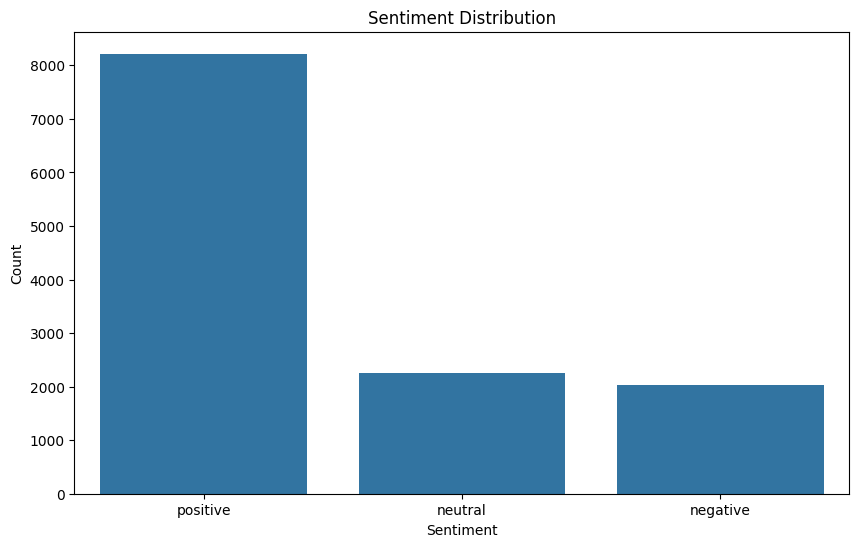

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


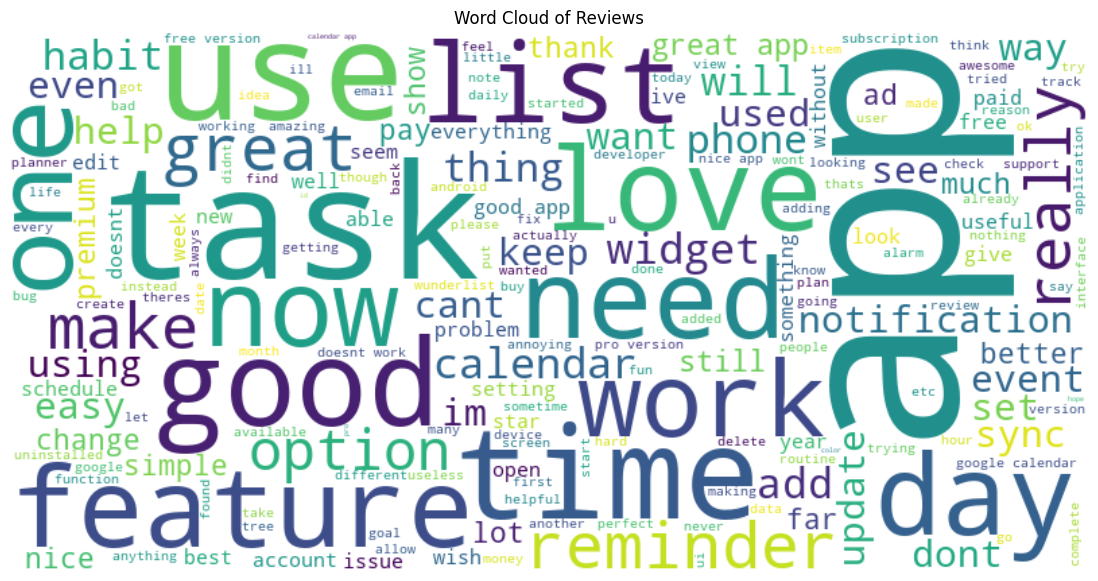

In [8]:
from wordcloud import WordCloud

# Generate word cloud
text = ' '.join(data['cleaned_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()


C:\Users\hemin\AppData\Local\Temp\ipykernel_27128\1461809136.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('at').resample('M')['score'].mean().plot()


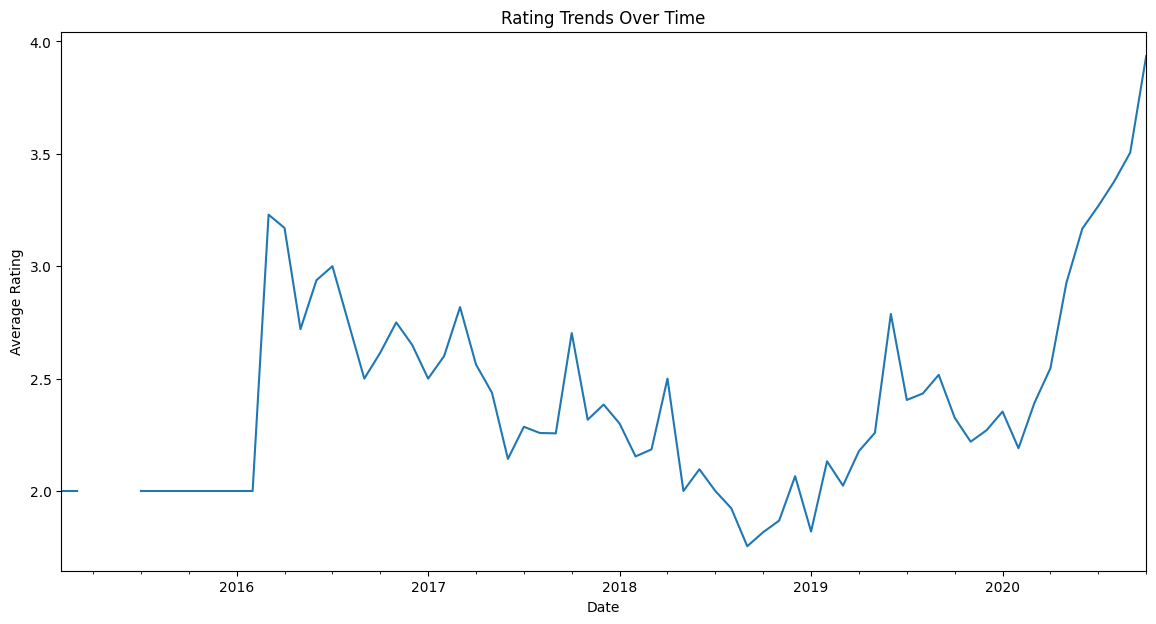

In [9]:
# Convert 'at' to datetime
data['at'] = pd.to_datetime(data['at'])

# Rating trends over time
plt.figure(figsize=(14, 7))
data.set_index('at').resample('M')['score'].mean().plot()
plt.title('Rating Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()


C:\Users\hemin\AppData\Local\Temp\ipykernel_27128\3560206610.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('at').resample('M')['sentiment_score'].mean().plot()


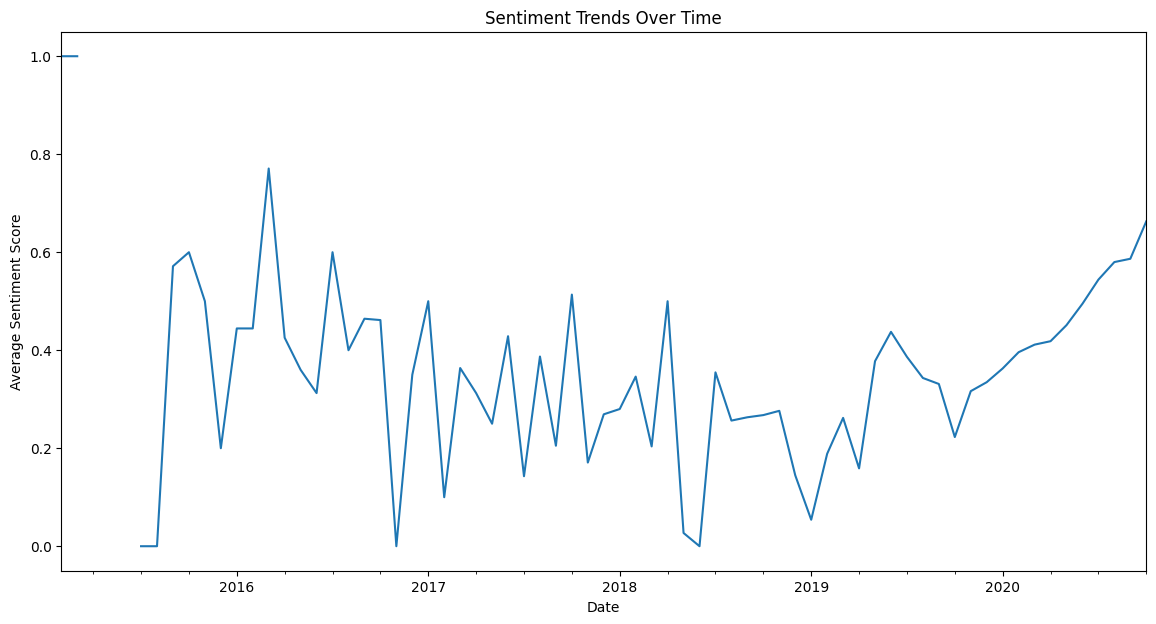

In [12]:
# Sentiment trends over time
data['sentiment_score'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else (-1 if x == 'negative' else 0))

plt.figure(figsize=(14, 7))
data.set_index('at').resample('M')['sentiment_score'].mean().plot()
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()


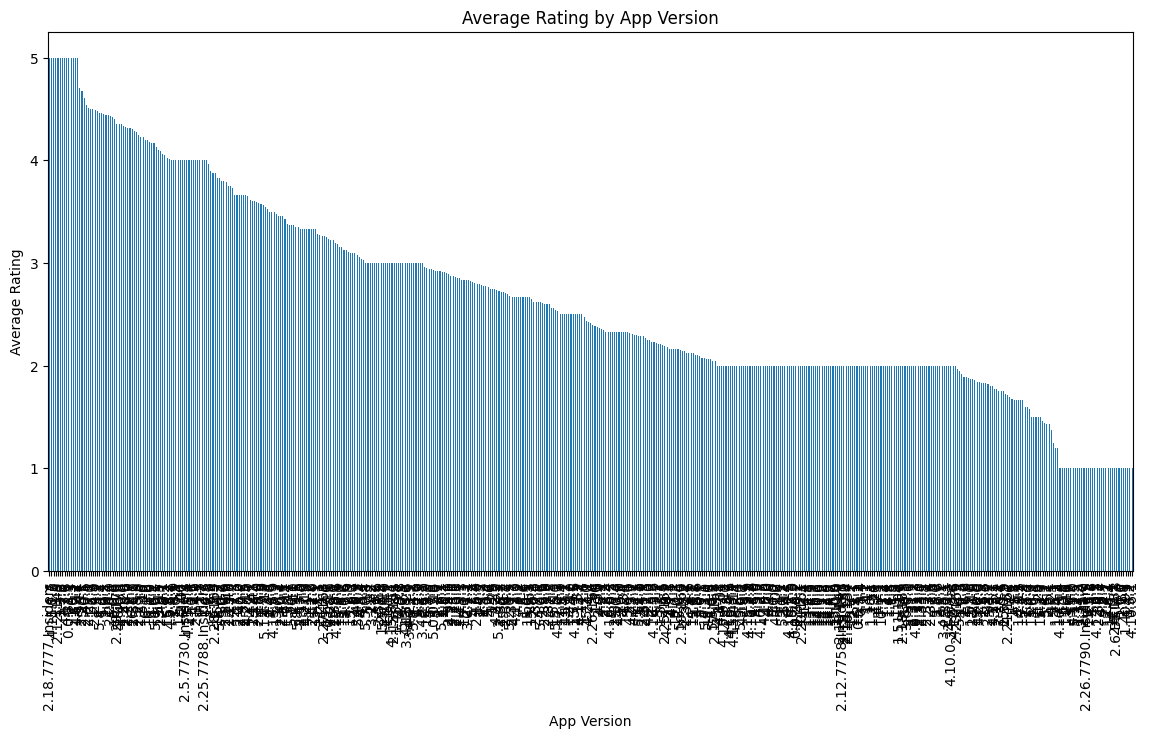

In [16]:
# Average rating by app version
avg_rating_by_version = data.groupby('reviewCreatedVersion')['score'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
avg_rating_by_version.plot(kind='bar')
plt.title('Average Rating by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Rating')
plt.show()


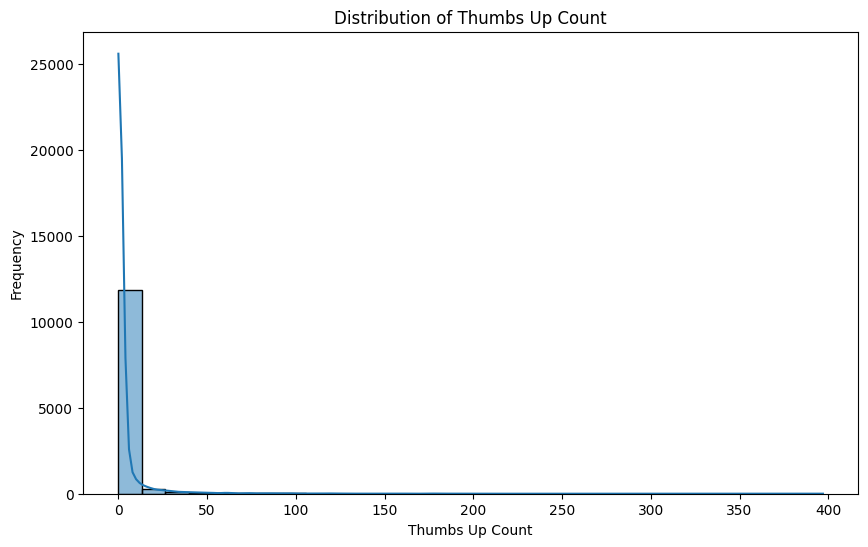

In [17]:
# Distribution of thumbs up count
plt.figure(figsize=(10, 6))
sns.histplot(data['thumbsUpCount'], bins=30, kde=True)
plt.title('Distribution of Thumbs Up Count')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()


<Figure size 1400x700 with 0 Axes>

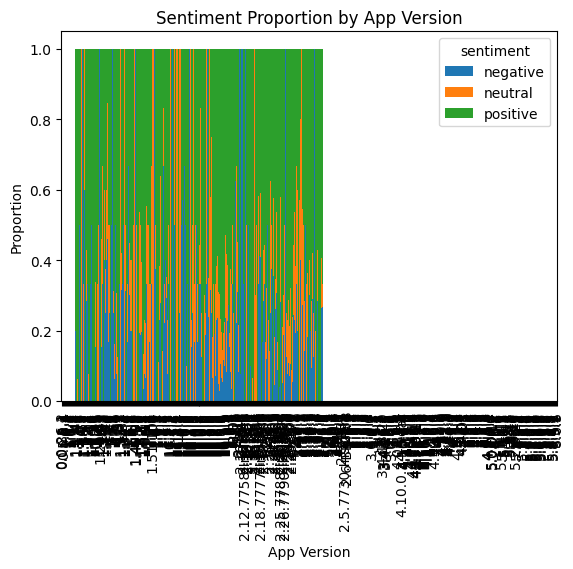

In [18]:
# Proportion of sentiment by app version
sentiment_proportion_by_version = data.groupby(['reviewCreatedVersion', 'sentiment']).size().unstack().fillna(0)
sentiment_proportion_by_version = sentiment_proportion_by_version.div(sentiment_proportion_by_version.sum(axis=1), axis=0)

plt.figure(figsize=(14, 7))
sentiment_proportion_by_version.plot(kind='bar', stacked=True)
plt.title('Sentiment Proportion by App Version')
plt.xlabel('App Version')
plt.ylabel('Proportion')
plt.show()


In [19]:
# Select top 10 reviews by thumbs up count
top_reviews = data.nlargest(10, 'thumbsUpCount')

# Display the top 10 reviews
top_reviews[['userName', 'content', 'score', 'thumbsUpCount', 'sentiment']]


,userName,content,score,thumbsUpCount,sentiment
12020,Deanna Wedell,"I like this app very much, because it's fairly...",3,397,positive
12187,Shirley Smart,I really like this app - its a lovely interfac...,4,339,positive
1274,Love Instead,"Seems like a good tool, but almost nothing tha...",2,319,positive
3977,Frooggle,I really loved this app. I used it regularly a...,1,290,positive
846,Anthony F. Norris,Excellent customer service and very reasonable...,5,282,positive
4371,Sapphire Blue,I absolutely love this!! I love using the deep...,4,281,positive
5023,Nick Andrews,It seems like this app is no longer supported....,2,278,negative
649,Michael Gordon,"Great tool. I use it every day. There's a bug,...",4,270,negative
9982,Sian Butterfield,Had high hopes for this because it had everyth...,2,241,negative
461,First Last,"The latest app update (7/26/20), ""new app navi...",3,231,positive


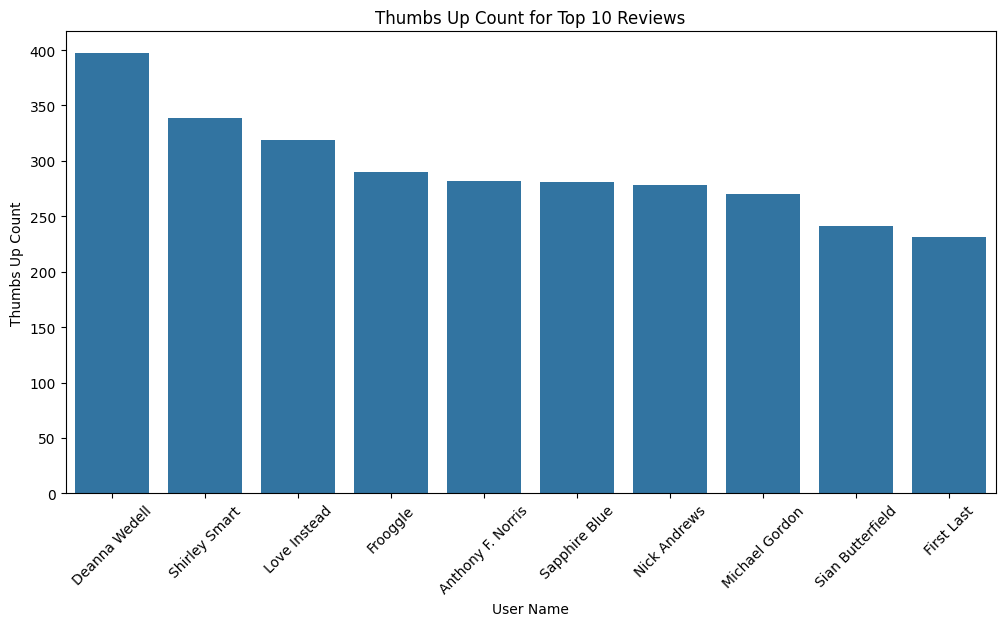

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of thumbs up count for top 10 reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviews['userName'], y=top_reviews['thumbsUpCount'])
plt.title('Thumbs Up Count for Top 10 Reviews')
plt.xlabel('User Name')
plt.ylabel('Thumbs Up Count')
plt.xticks(rotation=45)
plt.show()


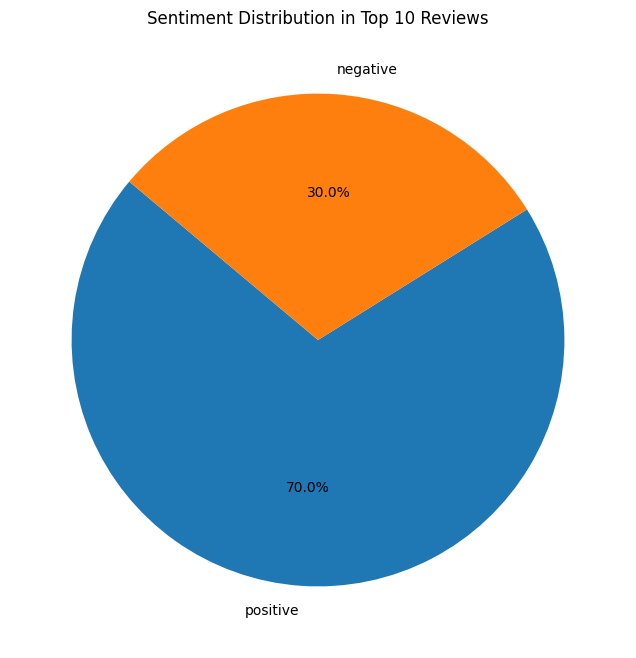

In [21]:
# Pie chart of sentiment distribution in top 10 reviews
sentiment_counts = top_reviews['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution in Top 10 Reviews')
plt.show()


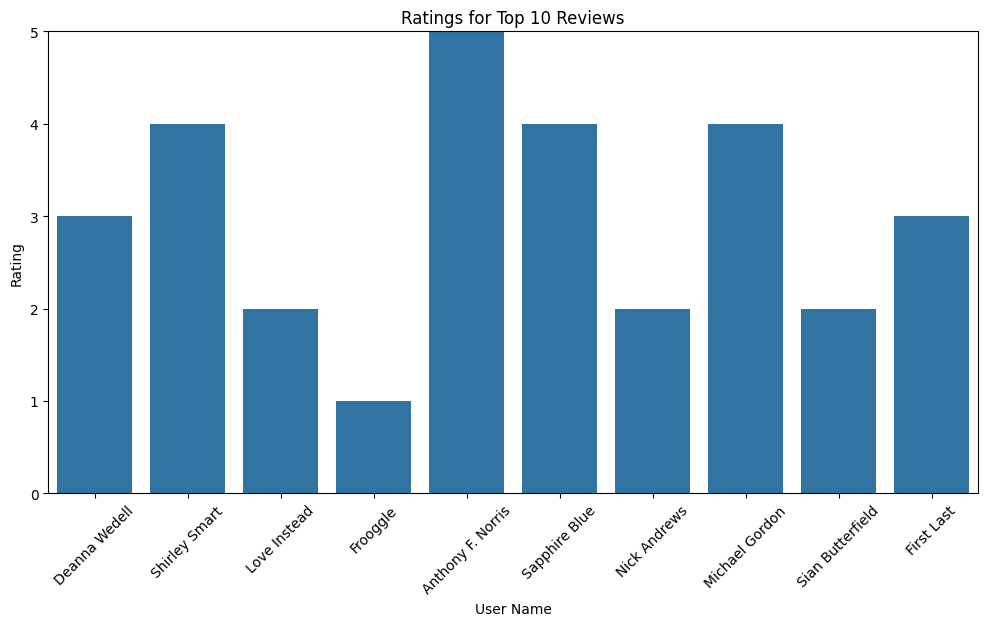

In [22]:

# Bar chart of ratings for top 10 reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviews['userName'], y=top_reviews['score'])
plt.title('Ratings for Top 10 Reviews')
plt.xlabel('User Name')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Ratings are between 0 and 5
plt.show()
